In [1]:
import tensorflow as tf
import pycode_similar
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                
import numpy as np          
import os                  
from random import shuffle      
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
os.chdir("C:/Users/Deeksha Priya/Desktop/Plant disease prediction/PlantVillage")

In [19]:
cur_path = os.getcwd()

In [20]:
cur_path

'C:\\Users\\Deeksha Priya\\Desktop\\Plant disease prediction\\PlantVillage'

In [21]:
img_size =128
input_shape=(img_size,img_size,3)

In [22]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

In [27]:
def create_train_data():
    training_data = []
    
    for folder in os.listdir(cur_path):
        i=0
        for img in os.listdir(cur_path+"/"+folder):
            i+=1
            path = os.path.join(cur_path+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (img_size,img_size))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [28]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,img_size,img_size,3)

train_x.shape

(7025, 128, 128, 3)

In [29]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [30]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)

In [31]:
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]) 
num_classes = 15

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax'))

In [32]:
""""model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(img_size,img_size,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))""""

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

SyntaxError: EOL while scanning string literal (<ipython-input-32-20b9e71d12ae>, line 29)

In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 58, 58, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 64)        0

In [34]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 246s 3s/step - loss: 2.4764 - accuracy: 0.2021 - val_loss: 1.8687 - val_accuracy: 0.4904
Epoch 2/20
88/88 [==============================] - 233s 3s/step - loss: 1.7325 - accuracy: 0.4496 - val_loss: 1.4143 - val_accuracy: 0.5865
Epoch 3/20
88/88 [==============================] - 228s 3s/step - loss: 1.3704 - accuracy: 0.5657 - val_loss: 1.1633 - val_accuracy: 0.6335
Epoch 4/20
88/88 [==============================] - 227s 3s/step - loss: 1.1697 - accuracy: 0.6235 - val_loss: 1.0211 - val_accuracy: 0.6797
Epoch 5/20
88/88 [==============================] - 225s 3s/step - loss: 0.9938 - accuracy: 0.6849 - val_loss: 0.8546 - val_accuracy: 0.7238
Epoch 6/20
88/88 [==============================] - 225s 3s/step - loss: 0.8553 - accuracy: 0.7345 - val_loss: 0.7764 - val_accuracy: 0.7488
Epoch 7/20
88/88 [==============================] - 227s 3s/step - loss: 0.7582 - accuracy: 0.7621 - val_loss: 0.7054 - val_accuracy: 0.7772
Epoch 8/20
88

In [35]:
predictions = model.predict(x_test)
predictions

array([[3.2017853e-03, 7.5073098e-04, 2.1033537e-02, ..., 3.7800436e-04,
        9.5841225e-04, 6.0854747e-04],
       [3.1709435e-10, 2.0664860e-08, 3.1647326e-06, ..., 9.9998724e-01,
        8.3970981e-06, 5.3742594e-14],
       [4.0531066e-07, 3.6235585e-07, 5.3001166e-08, ..., 7.6427699e-07,
        7.5486088e-07, 2.3247546e-09],
       ...,
       [2.0254116e-05, 2.8428485e-06, 2.9808714e-08, ..., 6.5453461e-04,
        1.8135842e-07, 4.3930027e-06],
       [1.2267032e-04, 3.1756306e-07, 1.7747440e-07, ..., 3.8508446e-05,
        3.5003035e-07, 9.8878878e-01],
       [2.5915531e-05, 1.2061517e-04, 1.6496935e-07, ..., 6.5497014e-05,
        5.2808947e-04, 3.0671422e-06]], dtype=float32)

In [36]:
y_preds = [np.argmax(i) for i in predictions]

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 76  12   2   1   0   0   0   1   0   2   0   1   0   0   1]
 [  8  87   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  2   0  97   0   2   0   0   0   0   2   0   0   0   0   0]
 [  3   4   0  24   2   0   0   1   1   2   0   0   0   1   0]
 [  2   3   3   0  78   0   0   1   4   6   0   7   0   1   0]
 [  1   0   0   0   2  55   0   1   0   7   0   0   0   2   7]
 [  0   0   0   0   0   1  77   0   0   0   0   0   2   0   3]
 [  2   0   0   0   0   0   0 101   3   0   0   1   0   0   1]
 [  0   0   0   0   1   0   0   2  91   1   0   0   0   0   0]
 [  2   1   1   0   0   4   0   1   6  47   1   6   3   0   2]
 [  0   0   0   0   0   0   0   0   1   1 109   0   0   0   0]
 [  3   1   3   0   2   0   0   1   0   7   0  71   2   0   2]
 [  2   0   0   0   0   0   0   1   0   4   0   0 104   1   2]
 [  2   3   4   1   5   0   2   2   2   2   0   7  16  60   2]
 [  1   2   0   0   1   1   1   3   0   2   0   0   0   0  96]]
              precision    recall  f1-score   support


In [38]:
custom = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50
176/176 [==============================] - 267s 2s/step - loss: 1.1255 - accuracy: 0.6333 - val_loss: 0.8252 - val_accuracy: 0.7374
Epoch 2/50
176/176 [==============================] - 265s 2s/step - loss: 0.9482 - accuracy: 0.6879 - val_loss: 0.6369 - val_accuracy: 0.7851
Epoch 3/50
176/176 [==============================] - 268s 2s/step - loss: 0.8568 - accuracy: 0.7178 - val_loss: 0.6226 - val_accuracy: 0.7950
Epoch 4/50
176/176 [==============================] - 265s 2s/step - loss: 0.8144 - accuracy: 0.7285 - val_loss: 0.5972 - val_accuracy: 0.8157
Epoch 5/50
176/176 [==============================] - 265s 2s/step - loss: 0.7342 - accuracy: 0.7573 - val_loss: 0.5946 - val_accuracy: 0.8157
Epoch 6/50
176/176 [==============================] - 266s 2s/step - loss: 0.7398 - accuracy: 0.7553 - val_loss: 0.5347 - val_accuracy: 0.8363
Epoch 7/50
176/176 [==============================] - 265s 2s/step - loss: 0.6998 - accuracy: 0.7660 - val_loss: 0.6710 - val_accuracy: 0.7765

In [39]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]

In [40]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 72   2   0   2   2   0   0   0   0   3   1   0   0   6   8]
 [  4  80   0   4   0   4   0   0   0   0   0   0   0   4   0]
 [  0   0  99   0   0   0   0   0   0   1   3   0   0   0   0]
 [  0   0   0  31   2   3   0   0   0   0   1   0   0   0   1]
 [  0   0   2   1  96   0   0   0   0   3   1   0   0   0   2]
 [  0   0   0   0   0  40   1   0   0   1  25   0   0   0   8]
 [  0   0   0   0   0   1  77   0   0   0   3   0   0   0   2]
 [  0   0   0   0   0   0   0  89   2   2   0   1   1   0  13]
 [  0   0   3   0   2   1   0   1  79   9   0   0   0   0   0]
 [  1   0   0   0   1   7   0   0   0  55   3   0   0   2   5]
 [  0   0   0   0   0   0   0   0   0   0 111   0   0   0   0]
 [  0   1   5   0   2   0   0   0   0  10   1  67   0   1   5]
 [  0   0   0   0   0   0   1   0   0   0   6   0  91   1  15]
 [  1   0   2   1   1   1   3   0   2   2   7   1   3  82   2]
 [  0   0   0   0   0   4   1   0   0   0  14   0   0   0  88]]
              precision    recall  f1-score   support


In [41]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

Tomato__Tomato_YellowLeaf__Curl_Virus


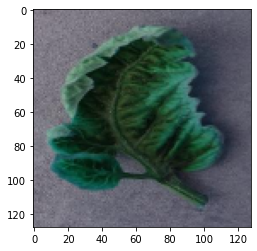

In [42]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

Pepper__bell___Bacterial_spot


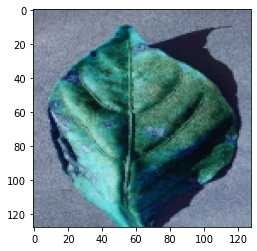

In [43]:
plt.imshow(train_x[80])
plt.show
print(classes[train_y[80]])

In [44]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,img_size,img_size,3))
predictions = model.predict(test)
predictions

array([[2.7194248e-05, 1.5109419e-10, 3.7843986e-10, 9.1411874e-09,
        1.8327684e-06, 1.4930415e-06, 1.5540660e-09, 9.9746215e-01,
        3.7828497e-05, 9.1640087e-04, 2.2050491e-08, 7.2668390e-06,
        4.5398588e-06, 7.0056774e-07, 1.5406642e-03]], dtype=float32)

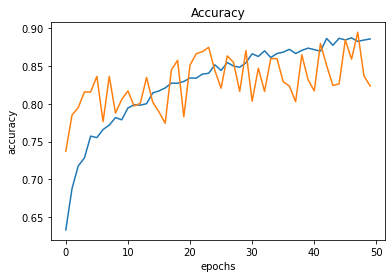

In [45]:
plt.figure(0)
plt.plot(custom.history['accuracy'], label = 'training accuracy')
plt.plot(custom.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

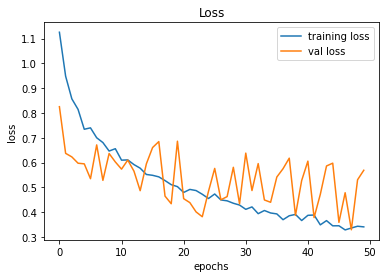

In [46]:
plt.plot(custom.history['loss'], label='training loss')
plt.plot(custom.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
model.save("crop_model.h5")

In [48]:
model =keras.models.load_model("crop_model.h5")